### Exploratory Data Analysis
Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv(r'C:\datasets\large_employee_data.csv')

# Display first 5 rows
print(df.head())

# Check basic information about the dataset
print(df.info())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

   ID      Name  Age  Gender  Salary Department Joining_Date
0   1    Andrew   29  Female  108578         IT   17-03-2012
1   2    Pamela   22    Male   92646         HR   15-03-2011
2   3      John   38    Male  100742         IT   14-08-2024
3   4   Michael   45    Male   41965         IT   10-09-2019
4   5  Michelle   46    Male   52098         IT   17-04-2020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            500 non-null    int64 
 1   Name          500 non-null    object
 2   Age           500 non-null    int64 
 3   Gender        500 non-null    object
 4   Salary        500 non-null    int64 
 5   Department    500 non-null    object
 6   Joining_Date  500 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.5+ KB
None
Missing Values:
 ID              0
Name            0
Age             0
Gender          0
Salary 

In [5]:
# Summary statistics for numerical columns
print("Numerical Summary:\n", df.describe())

# Count unique values for categorical columns
print("Gender Distribution:\n", df['Gender'].value_counts())
print("Department Distribution:\n", df['Department'].value_counts())

Numerical Summary:
                ID         Age         Salary
count  500.000000  500.000000     500.000000
mean   250.500000   40.876000   80718.876000
std    144.481833   11.045389   23199.384751
min      1.000000   22.000000   40079.000000
25%    125.750000   31.000000   59846.750000
50%    250.500000   41.500000   81479.500000
75%    375.250000   50.000000  100443.750000
max    500.000000   60.000000  119963.000000
Gender Distribution:
 Gender
Male      261
Female    239
Name: count, dtype: int64
Department Distribution:
 Department
IT            125
Operations     96
Finance        94
HR             93
Management     92
Name: count, dtype: int64


In [11]:
# Convert Joining_Date to datetime
df['Joining_Date'] = pd.to_datetime(df['Joining_Date'], errors='coerce')

# Add a column for experience in years
df['Experience (Years)'] = 2024 - df['Joining_Date'].dt.year

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())
df

Number of duplicates: 0


,ID,Name,Age,Gender,Salary,Department,Joining_Date,Experience (Years)
0,1,Andrew,29,Female,108578,IT,2012-03-17,12
1,2,Pamela,22,Male,92646,HR,2011-03-15,13
2,3,John,38,Male,100742,IT,2024-08-14,0
3,4,Michael,45,Male,41965,IT,2019-09-10,5
4,5,Michelle,46,Male,52098,IT,2020-04-17,4
...,...,...,...,...,...,...,...,...
495,496,Tiffany,27,Female,80233,HR,2019-08-17,5
496,497,Cheryl,28,Male,94457,HR,2018-08-06,6
497,498,Mark,59,Male,93097,Operations,2017-10-24,7
498,499,Steven,43,Female,113706,HR,2023-06-20,1


#### Visualize the distribution of salaries.

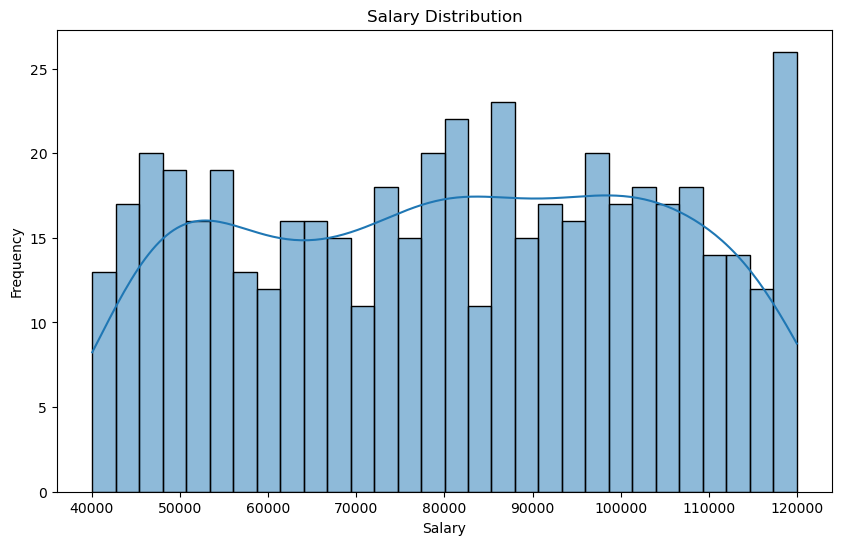

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

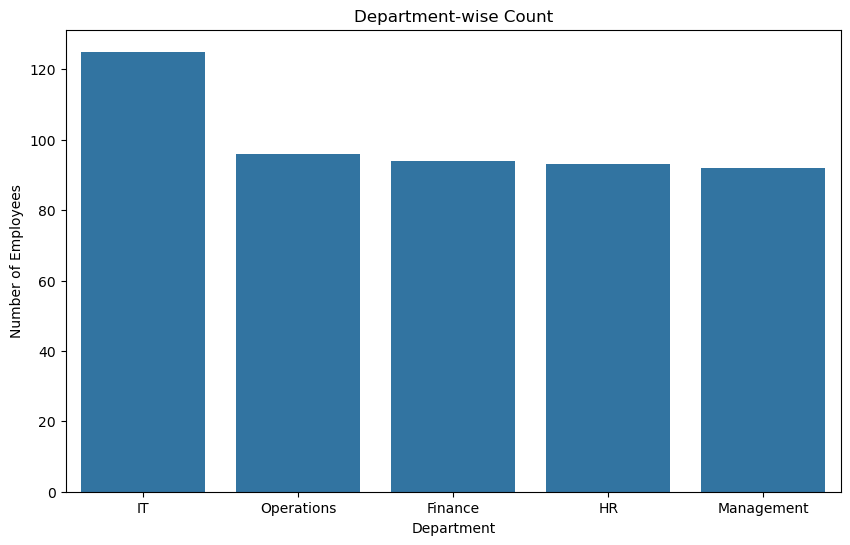

In [16]:
#Visualize the count of employees in each department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df, order=df['Department'].value_counts().index)
plt.title('Department-wise Count')
plt.ylabel('Number of Employees')
plt.show()

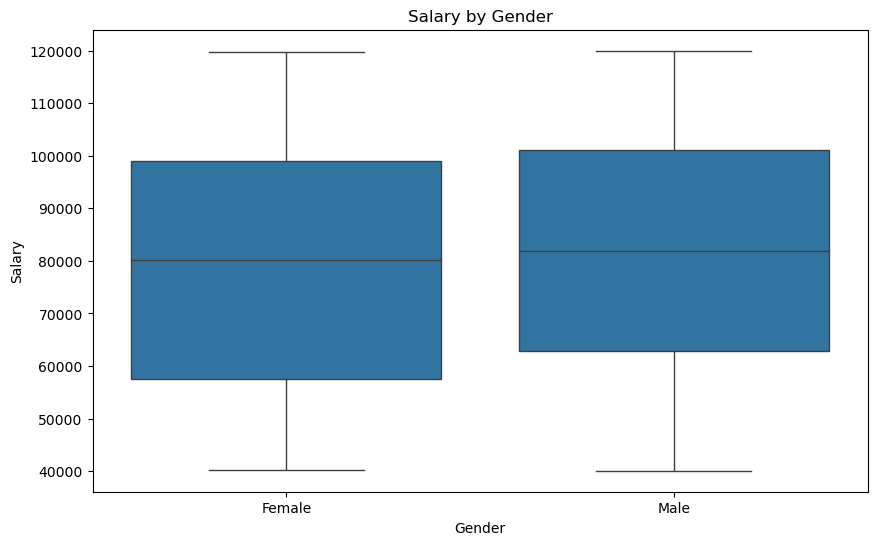

In [18]:
#Gender-wise Salary Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

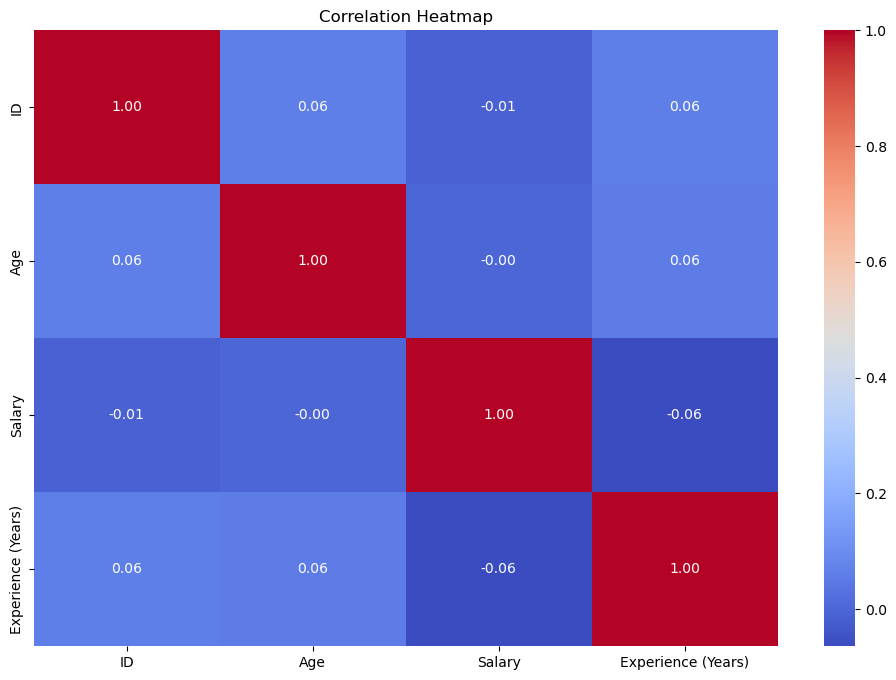

In [20]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()